In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
import pandas as pd
station_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
station_all["dir_o"].describe()

                     Unnamed: 0.1      temp_o  tempd_o    rh_o  dir_o  \
time                                                                    
2018-09-08 03:30:00        187900  291.150001   288.15   82.62  240.0   
2018-09-08 04:00:00        187901  291.150001   288.15   82.62  230.0   
2018-09-08 04:30:00        187902  291.150001   288.15   82.62  220.0   
2018-09-08 05:00:00        187903  290.149999   288.15   88.00  230.0   
2018-09-08 05:30:00        187904  290.149999   288.15   88.00  200.0   
...                           ...         ...      ...     ...    ...   
2020-12-24 21:30:00        229245  278.150000   278.15  100.00   50.0   
2020-12-24 22:00:00        229246  278.150000   277.15   93.24   60.0   
2020-12-24 22:30:00        229247  278.150000   277.15   93.24   80.0   
2020-12-24 23:00:00        229248  278.150000   277.15   93.24   30.0   
2020-12-24 23:30:00        229249  278.150000   277.15   93.24   40.0   

                        spd_o wind_gust_o  mslp_o 

count    41350.000000
mean       160.983990
std        115.183827
min         -1.000000
25%         20.000000
50%        200.000000
75%        240.000000
max        360.000000
Name: dir_o, dtype: float64

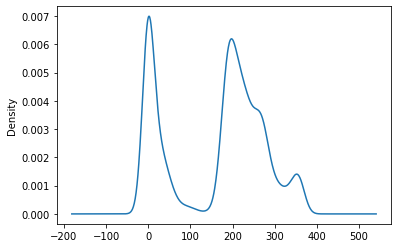

In [11]:
station = station_all[["dir_o","temp_o"]]
station.dir_o.plot(kind ="kde");

In [12]:
#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-1.5, -0.5),(-0.5,20), (20, 40), (40, 60),
                                           (60,80),(80,100),(100,120),(120,140),(140,160),
                                           (160,180),(180,200),(200,220),(220,240),
                                           (240,260),(260,280),(280,300),(300,320),
                                           (320,340),(340,360)])
labels = ['VRB', '[0.0, 20.0]', '(20.0, 40.0]', '(40.0, 60.0]',
        '(60.0, 80.0]', '(80.0, 100.0]', '(100.0, 120.0]', '(120.0, 140.0]',
        '(140.0, 160.0]', '(160.0, 180.0]', '(180.0, 200.0]', '(200.0, 220.0]',
        '(220.0, 240.0]', '(240.0, 260.0]', '(260.0, 280.0]', '(280.0, 300.0]',
        '(300.0, 320.0]', '(320.0, 340.0]', '(340.0, 360.0]']

station["dir_l"] = pd.cut(station["dir_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
station=station.drop(columns=["temp_o"])
station.sample(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,dir_o,dir_l
time,,
2020-08-07 12:00:00,250.0,"(240.0, 260.0]"
2019-03-31 22:00:00,230.0,"(220.0, 240.0]"
2019-06-16 13:00:00,280.0,"(260.0, 280.0]"
2019-07-24 10:30:00,250.0,"(240.0, 260.0]"
2020-03-07 03:30:00,250.0,"(240.0, 260.0]"
2019-03-14 03:00:00,20.0,"[0.0, 20.0]"
2020-03-24 23:00:00,-1.0,VRB
2019-01-03 11:30:00,210.0,"(200.0, 220.0]"
2020-11-10 02:00:00,240.0,"(220.0, 240.0]"


**Forecast D0**

In [14]:
#ria forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).set_index("time")
model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,0,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,1,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,2,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,3,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,4,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,16762,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,16763,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,16764,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [15]:
#label meteorological model prec points 0 to 9
model1k["dir0_l"] = pd.cut(model1k["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model1k["dir1_l"] = pd.cut(model1k["dir1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)



In [16]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k = df_all1k.drop(columns=["dir_o"])
df_all1k[["dir_l","dir0_l","dir1_l"]].sample(20)

,dir_l,dir0_l,dir1_l
time,,,
2019-06-13 21:00:00,"(260.0, 280.0]","(260.0, 280.0]","(260.0, 280.0]"
2019-06-21 19:00:00,"(260.0, 280.0]","(280.0, 300.0]","(260.0, 280.0]"
2019-01-09 08:00:00,"(220.0, 240.0]","(160.0, 180.0]","(140.0, 160.0]"
2020-05-02 09:00:00,"(180.0, 200.0]","(160.0, 180.0]","(160.0, 180.0]"
2020-07-13 22:00:00,"[0.0, 20.0]","[0.0, 20.0]","(20.0, 40.0]"
2019-04-29 17:00:00,"(240.0, 260.0]","(280.0, 300.0]","(260.0, 280.0]"
2020-03-23 01:00:00,"[0.0, 20.0]","[0.0, 20.0]","(20.0, 40.0]"
2020-03-14 21:00:00,"(280.0, 300.0]","(280.0, 300.0]","(280.0, 300.0]"
2019-06-20 18:00:00,"(300.0, 320.0]","(340.0, 360.0]","(340.0, 360.0]"


In [17]:
print("station\n",df_all1k["dir_l"].value_counts(normalize=True))
print("point 0\n",df_all1k["dir0_l"].value_counts(normalize=True))
print("point 1\n",df_all1k["dir1_l"].value_counts(normalize=True))



station
 VRB               0.183022
(180.0, 200.0]    0.136568
(200.0, 220.0]    0.103534
(260.0, 280.0]    0.083556
[0.0, 20.0]       0.082038
(220.0, 240.0]    0.078820
(240.0, 260.0]    0.074022
(160.0, 180.0]    0.058295
(340.0, 360.0]    0.048093
(20.0, 40.0]      0.046697
(280.0, 300.0]    0.027265
(40.0, 60.0]      0.021496
(300.0, 320.0]    0.020525
(320.0, 340.0]    0.017185
(60.0, 80.0]      0.006619
(80.0, 100.0]     0.005769
(140.0, 160.0]    0.002854
(100.0, 120.0]    0.002247
(120.0, 140.0]    0.001397
Name: dir_l, dtype: float64
point 0
 (160.0, 180.0]    0.141183
(140.0, 160.0]    0.140272
(280.0, 300.0]    0.132864
[0.0, 20.0]       0.094000
(260.0, 280.0]    0.085681
(300.0, 320.0]    0.057870
(340.0, 360.0]    0.049429
(120.0, 140.0]    0.041839
(180.0, 200.0]    0.036920
(20.0, 40.0]      0.036859
(320.0, 340.0]    0.032548
(240.0, 260.0]    0.032487
(220.0, 240.0]    0.024532
(200.0, 220.0]    0.023622
(80.0, 100.0]     0.022771
(100.0, 120.0]    0.019796
(40.0, 60

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



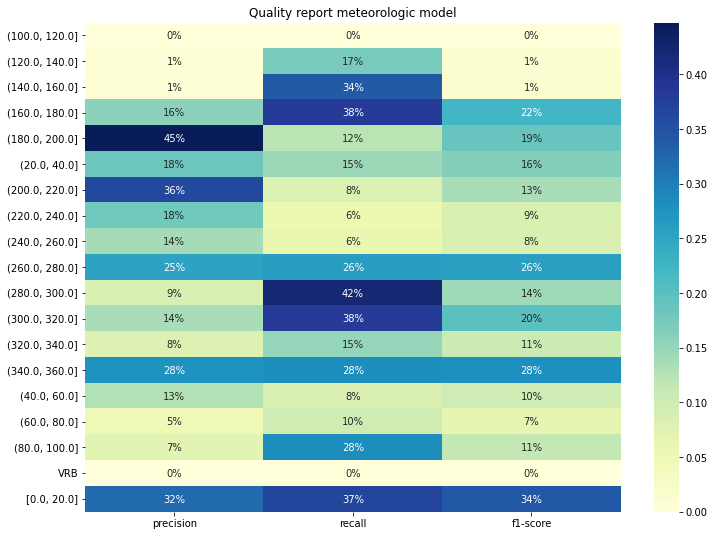

In [18]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model")
cr=pd.DataFrame(classification_report(df_all1k.dir_l, df_all1k.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


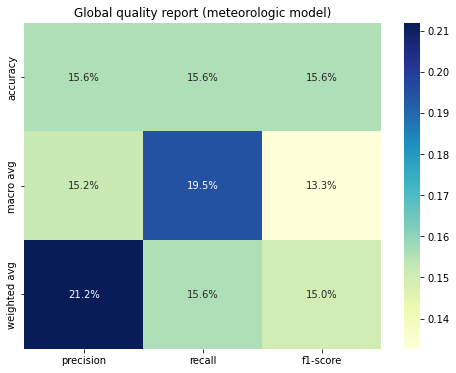

In [19]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

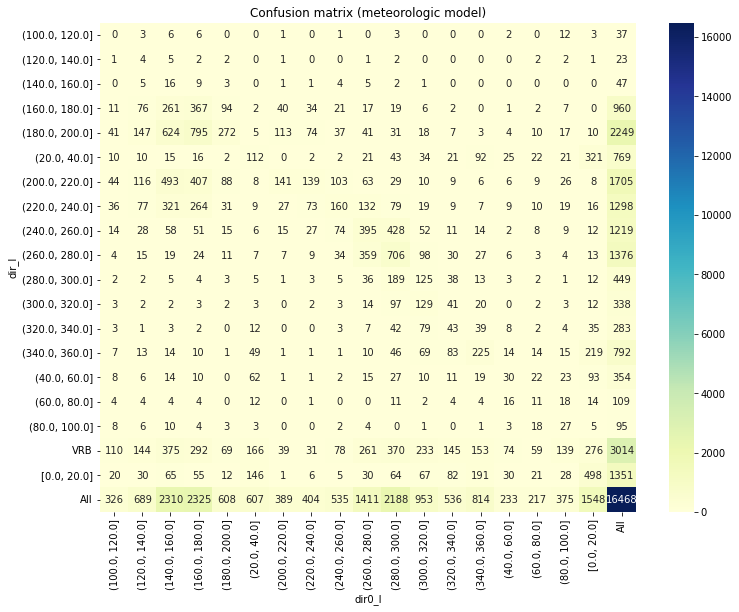

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model)")

global_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

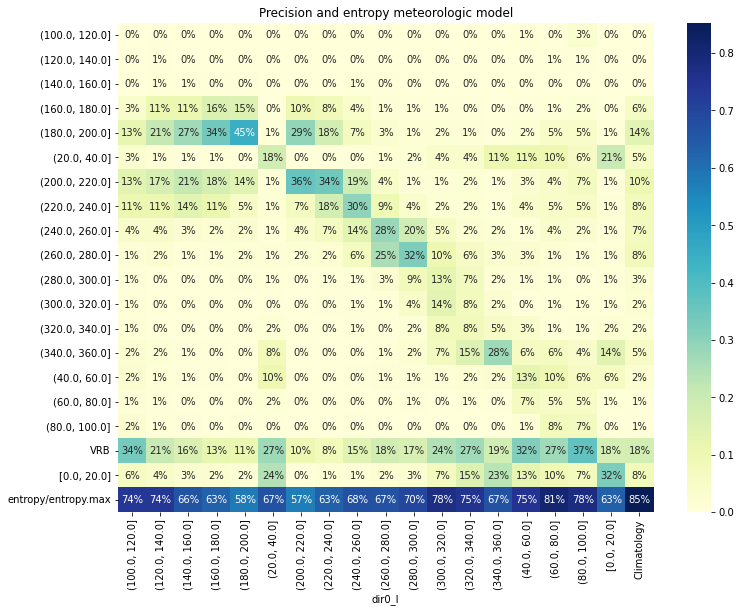

In [21]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model")
column_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [22]:
model1k.drop(columns=["Unnamed: 0","dir0_l","dir1_l"])

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,6.723936,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,6.389383,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,6.182112,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,6.556708,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,7.131637,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,28.912556,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,21.361237,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,13.615123,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


**ML LGBMClassifier**


Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                precision    recall  f1-score      support
(100.0, 120.0]   0.000000  0.000000  0.000000     6.000000
(120.0, 140.0]   0.000000  0.000000  0.000000     8.000000
(140.0, 160.0]   0.000000  0.000000  0.000000     5.000000
(160.0, 180.0]   0.428571  0.222973  0.293333   148.000000
(180.0, 200.0]   0.440476  0.557229  0.492021   332.000000
(20.0, 40.0]     0.313253  0.234234  0.268041   111.000000
(200.0, 220.0]   0.401709  0.356061  0.377510   264.000000
(220.0, 240.0]   0.412698  0.386139  0.398977   202.000000
(240.0, 260.0]   0.328000  0.235632  0.274247   174.000000
(260.0, 280.0]   0.373541  0.510638  0.431461   188.000000
(280.0, 300.0]   0.305556  0.148649  0.200000    74.000000
(300.0, 320.0]   0.343750  0.192982  0.247191    57.000000
(320.0, 340.0]   0.222222  0.086957  0.125000    46.000000
(340.0, 360.0]   0.505882  0.330769  0.400000   130.000000
(40.0, 60.0]     0.421053  0.125000  0.192771    64.000000
(60.0, 80.0]     0.333333  0.071429  0.117647    14.0000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                precision    recall  f1-score      support
(100.0, 120.0]   1.000000  0.200000  0.333333     5.000000
(120.0, 140.0]   0.000000  0.000000  0.000000     4.000000
(140.0, 160.0]   0.000000  0.000000  0.000000    11.000000
(160.0, 180.0]   0.505747  0.283871  0.363636   155.000000
(180.0, 200.0]   0.479810  0.570621  0.521290   354.000000
(20.0, 40.0]     0.449275  0.238462  0.311558   130.000000
(200.0, 220.0]   0.400778  0.400778  0.400778   257.000000
(220.0, 240.0]   0.491620  0.407407  0.445570   216.000000
(240.0, 260.0]   0.298137  0.300000  0.299065   160.000000
(260.0, 280.0]   0.454545  0.552486  0.498753   181.000000
(280.0, 300.0]   0.375000  0.155844  0.220183    77.000000
(300.0, 320.0]   0.242424  0.181818  0.207792    44.000000
(320.0, 340.0]   0.277778  0.116279  0.163934    43.000000
(340.0, 360.0]   0.343750  0.292035  0.315789   113.000000
(40.0, 60.0]     0.269231  0.159091  0.200000    44.000000
(60.0, 80.0]     0.500000  0.062500  0.111111    16.0000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                precision    recall  f1-score      support
(100.0, 120.0]   0.000000  0.000000  0.000000     6.000000
(120.0, 140.0]   0.000000  0.000000  0.000000     5.000000
(140.0, 160.0]   0.000000  0.000000  0.000000     6.000000
(160.0, 180.0]   0.426829  0.238095  0.305677   147.000000
(180.0, 200.0]   0.496520  0.592798  0.540404   361.000000
(20.0, 40.0]     0.414286  0.273585  0.329545   106.000000
(200.0, 220.0]   0.434783  0.434783  0.434783   253.000000
(220.0, 240.0]   0.422460  0.407216  0.414698   194.000000
(240.0, 260.0]   0.295455  0.210811  0.246057   185.000000
(260.0, 280.0]   0.431034  0.518135  0.470588   193.000000
(280.0, 300.0]   0.266667  0.193548  0.224299    62.000000
(300.0, 320.0]   0.266667  0.119403  0.164948    67.000000
(320.0, 340.0]   0.352941  0.117647  0.176471    51.000000
(340.0, 360.0]   0.422680  0.353448  0.384977   116.000000
(40.0, 60.0]     0.083333  0.022222  0.035088    45.000000
(60.0, 80.0]     0.000000  0.000000  0.000000     9.0000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                precision    recall  f1-score      support
(100.0, 120.0]   0.000000  0.000000  0.000000    11.000000
(120.0, 140.0]   0.000000  0.000000  0.000000     2.000000
(140.0, 160.0]   0.000000  0.000000  0.000000     8.000000
(160.0, 180.0]   0.469880  0.254902  0.330508   153.000000
(180.0, 200.0]   0.494481  0.632768  0.555143   354.000000
(20.0, 40.0]     0.313953  0.241071  0.272727   112.000000
(200.0, 220.0]   0.422907  0.379447  0.400000   253.000000
(220.0, 240.0]   0.400000  0.365591  0.382022   186.000000
(240.0, 260.0]   0.338462  0.237838  0.279365   185.000000
(260.0, 280.0]   0.433884  0.509709  0.468750   206.000000
(280.0, 300.0]   0.250000  0.140845  0.180180    71.000000
(300.0, 320.0]   0.476190  0.232558  0.312500    43.000000
(320.0, 340.0]   0.181818  0.055556  0.085106    36.000000
(340.0, 360.0]   0.441860  0.316667  0.368932   120.000000
(40.0, 60.0]     0.285714  0.139535  0.187500    43.000000
(60.0, 80.0]     0.000000  0.000000  0.000000    16.0000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                precision    recall  f1-score      support
(100.0, 120.0]   0.000000  0.000000  0.000000     7.000000
(120.0, 140.0]   0.000000  0.000000  0.000000     6.000000
(140.0, 160.0]   0.000000  0.000000  0.000000     9.000000
(160.0, 180.0]   0.488372  0.262500  0.341463   160.000000
(180.0, 200.0]   0.443396  0.582043  0.503347   323.000000
(20.0, 40.0]     0.346154  0.236842  0.281250   114.000000
(200.0, 220.0]   0.441558  0.421488  0.431290   242.000000
(220.0, 240.0]   0.377246  0.348066  0.362069   181.000000
(240.0, 260.0]   0.346774  0.233696  0.279221   184.000000
(260.0, 280.0]   0.438053  0.487685  0.461538   203.000000
(280.0, 300.0]   0.222222  0.133333  0.166667    60.000000
(300.0, 320.0]   0.333333  0.222222  0.266667    45.000000
(320.0, 340.0]   0.266667  0.085106  0.129032    47.000000
(340.0, 360.0]   0.378641  0.322314  0.348214   121.000000
(40.0, 60.0]     0.400000  0.153846  0.222222    52.000000
(60.0, 80.0]     0.333333  0.076923  0.125000    13.0000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                precision    recall  f1-score      support
(100.0, 120.0]   0.000000  0.000000  0.000000     7.000000
(120.0, 140.0]   0.000000  0.000000  0.000000     4.000000
(140.0, 160.0]   0.000000  0.000000  0.000000     7.000000
(160.0, 180.0]   0.506173  0.278912  0.359649   147.000000
(180.0, 200.0]   0.501160  0.631579  0.558862   342.000000
(20.0, 40.0]     0.388889  0.259259  0.311111   108.000000
(200.0, 220.0]   0.455253  0.431734  0.443182   271.000000
(220.0, 240.0]   0.464516  0.382979  0.419825   188.000000
(240.0, 260.0]   0.279412  0.258503  0.268551   147.000000
(260.0, 280.0]   0.458678  0.497758  0.477419   223.000000
(280.0, 300.0]   0.344828  0.156250  0.215054    64.000000
(300.0, 320.0]   0.296296  0.170213  0.216216    47.000000
(320.0, 340.0]   0.318182  0.148936  0.202899    47.000000
(340.0, 360.0]   0.402439  0.282051  0.331658   117.000000
(40.0, 60.0]     0.166667  0.040816  0.065574    49.000000
(60.0, 80.0]     0.333333  0.055556  0.095238    18.0000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                precision    recall  f1-score      support
(100.0, 120.0]   0.000000  0.000000  0.000000     6.000000
(120.0, 140.0]   0.000000  0.000000  0.000000     3.000000
(140.0, 160.0]   0.000000  0.000000  0.000000     9.000000
(160.0, 180.0]   0.379310  0.215686  0.275000   153.000000
(180.0, 200.0]   0.438914  0.543417  0.485607   357.000000
(20.0, 40.0]     0.350649  0.234783  0.281250   115.000000
(200.0, 220.0]   0.386364  0.392308  0.389313   260.000000
(220.0, 240.0]   0.431953  0.388298  0.408964   188.000000
(240.0, 260.0]   0.370079  0.246073  0.295597   191.000000
(260.0, 280.0]   0.407407  0.505102  0.451025   196.000000
(280.0, 300.0]   0.166667  0.096154  0.121951    52.000000
(300.0, 320.0]   0.266667  0.181818  0.216216    44.000000
(320.0, 340.0]   0.214286  0.103448  0.139535    29.000000
(340.0, 360.0]   0.432432  0.250000  0.316832   128.000000
(40.0, 60.0]     0.214286  0.115385  0.150000    52.000000
(60.0, 80.0]     0.000000  0.000000  0.000000    11.0000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                precision    recall  f1-score      support
(100.0, 120.0]   0.000000  0.000000  0.000000     9.000000
(120.0, 140.0]   0.000000  0.000000  0.000000     2.000000
(140.0, 160.0]   0.000000  0.000000  0.000000     7.000000
(160.0, 180.0]   0.445783  0.268116  0.334842   138.000000
(180.0, 200.0]   0.491917  0.608571  0.544061   350.000000
(20.0, 40.0]     0.406593  0.336364  0.368159   110.000000
(200.0, 220.0]   0.391635  0.413655  0.402344   249.000000
(220.0, 240.0]   0.429412  0.376289  0.401099   194.000000
(240.0, 260.0]   0.344595  0.257576  0.294798   198.000000
(260.0, 280.0]   0.438914  0.477833  0.457547   203.000000
(280.0, 300.0]   0.270270  0.181818  0.217391    55.000000
(300.0, 320.0]   0.212121  0.170732  0.189189    41.000000
(320.0, 340.0]   0.250000  0.068182  0.107143    44.000000
(340.0, 360.0]   0.397849  0.286822  0.333333   129.000000
(40.0, 60.0]     0.428571  0.166667  0.240000    54.000000
(60.0, 80.0]     0.000000  0.000000  0.000000    18.0000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                precision    recall  f1-score     support
(100.0, 120.0]   0.000000  0.000000  0.000000     6.00000
(120.0, 140.0]   0.000000  0.000000  0.000000     6.00000
(140.0, 160.0]   0.000000  0.000000  0.000000     8.00000
(160.0, 180.0]   0.515152  0.288136  0.369565   118.00000
(180.0, 200.0]   0.554430  0.620397  0.585561   353.00000
(20.0, 40.0]     0.344828  0.267857  0.301508   112.00000
(200.0, 220.0]   0.426357  0.436508  0.431373   252.00000
(220.0, 240.0]   0.386243  0.388298  0.387268   188.00000
(240.0, 260.0]   0.398551  0.283505  0.331325   194.00000
(260.0, 280.0]   0.452282  0.506977  0.478070   215.00000
(280.0, 300.0]   0.256410  0.175439  0.208333    57.00000
(300.0, 320.0]   0.409091  0.152542  0.222222    59.00000
(320.0, 340.0]   0.272727  0.142857  0.187500    42.00000
(340.0, 360.0]   0.476190  0.325203  0.386473   123.00000
(40.0, 60.0]     0.388889  0.140000  0.205882    50.00000
(60.0, 80.0]     0.285714  0.100000  0.148148    20.00000
(80.0, 100.0] 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                precision    recall  f1-score      support
(100.0, 120.0]   0.000000  0.000000  0.000000     6.000000
(120.0, 140.0]   0.000000  0.000000  0.000000     2.000000
(140.0, 160.0]   0.000000  0.000000  0.000000     6.000000
(160.0, 180.0]   0.554217  0.312925  0.400000   147.000000
(180.0, 200.0]   0.542500  0.630814  0.583333   344.000000
(20.0, 40.0]     0.309524  0.268041  0.287293    97.000000
(200.0, 220.0]   0.480851  0.480851  0.480851   235.000000
(220.0, 240.0]   0.426901  0.359606  0.390374   203.000000
(240.0, 260.0]   0.403226  0.247525  0.306748   202.000000
(260.0, 280.0]   0.416357  0.535885  0.468619   209.000000
(280.0, 300.0]   0.325000  0.188406  0.238532    69.000000
(300.0, 320.0]   0.421053  0.355556  0.385542    45.000000
(320.0, 340.0]   0.500000  0.066667  0.117647    45.000000
(340.0, 360.0]   0.354167  0.326923  0.340000   104.000000
(40.0, 60.0]     0.307692  0.066667  0.109589    60.000000
(60.0, 80.0]     0.166667  0.055556  0.083333    18.0000

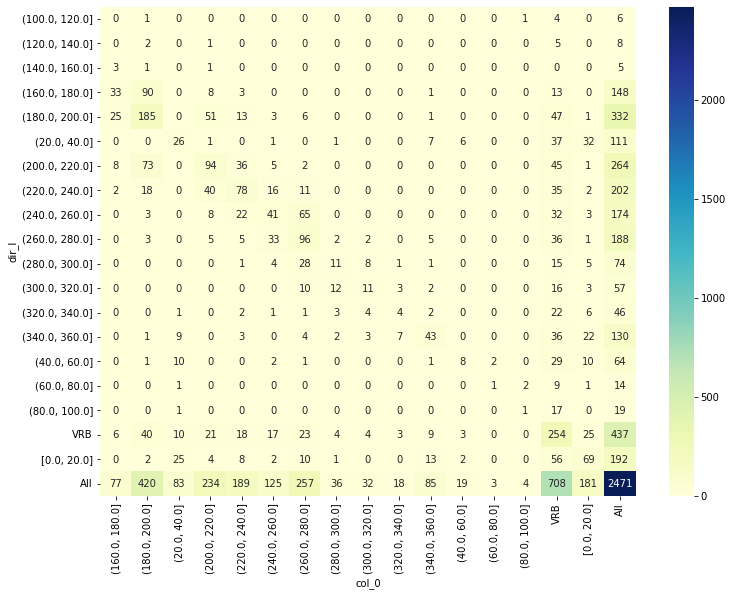

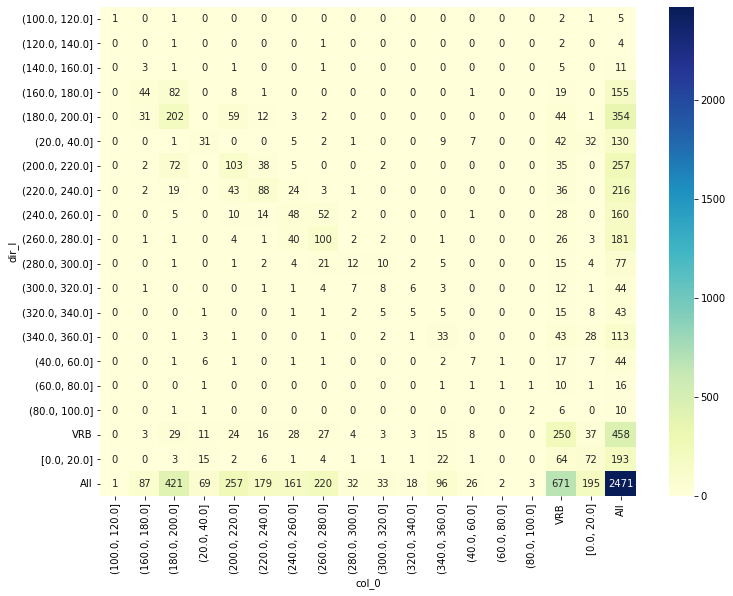

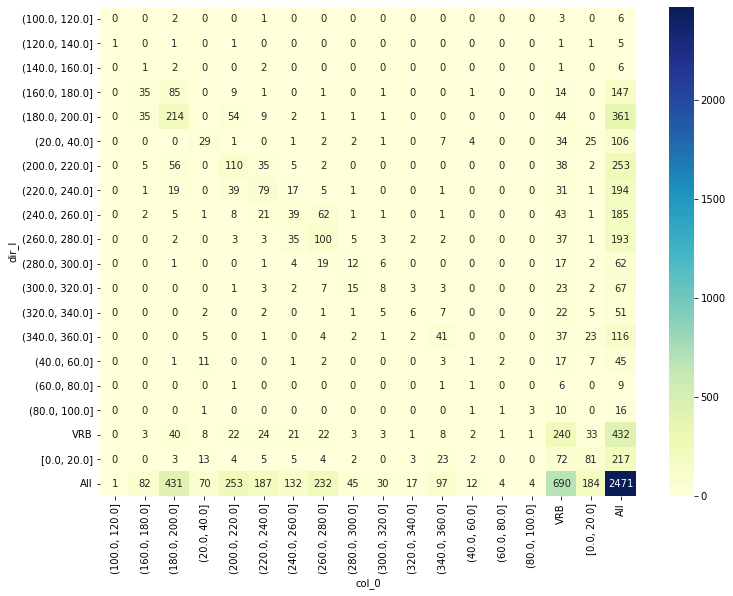

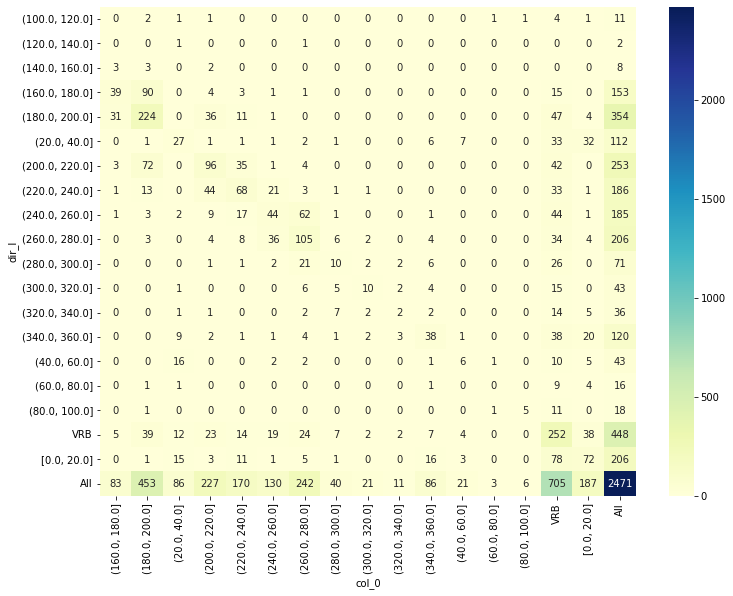

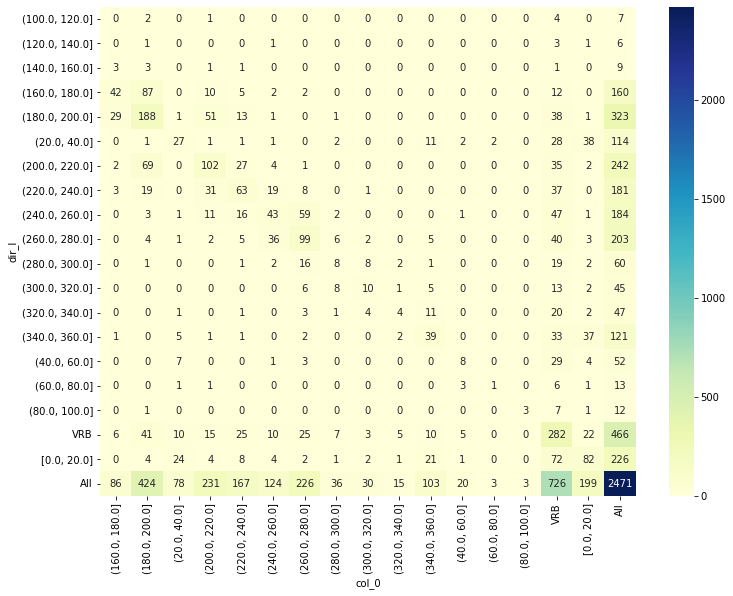

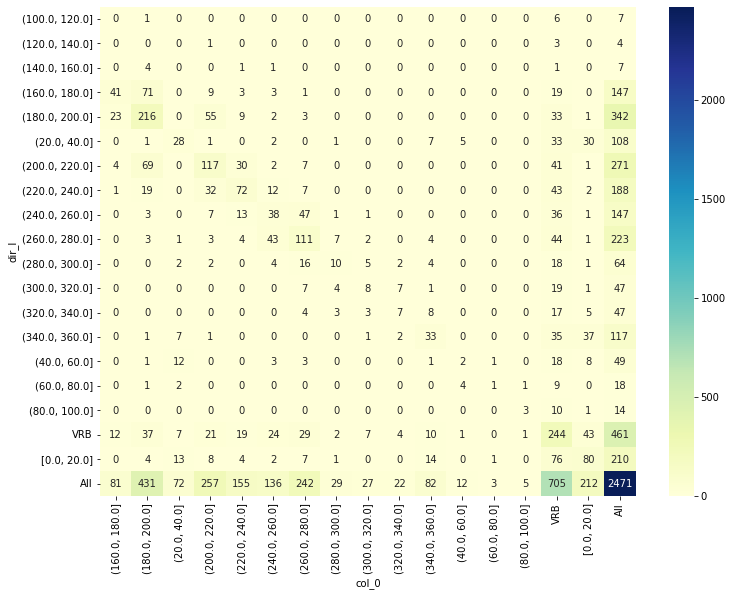

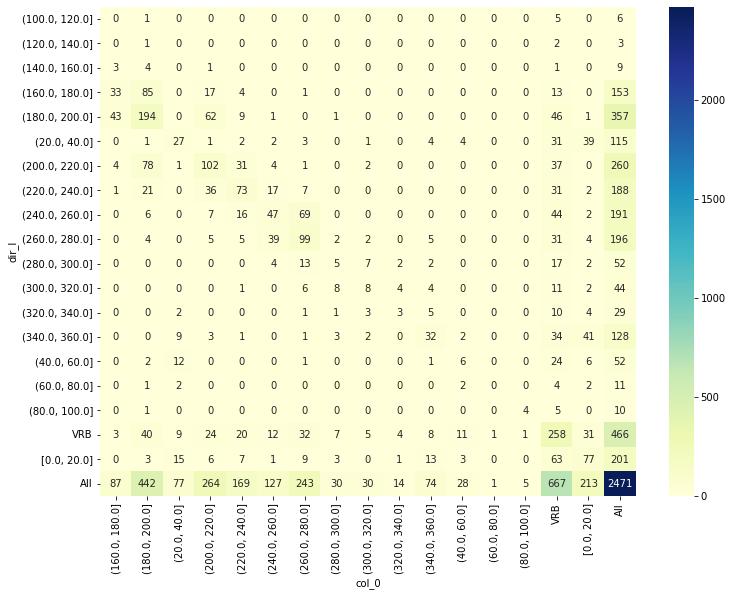

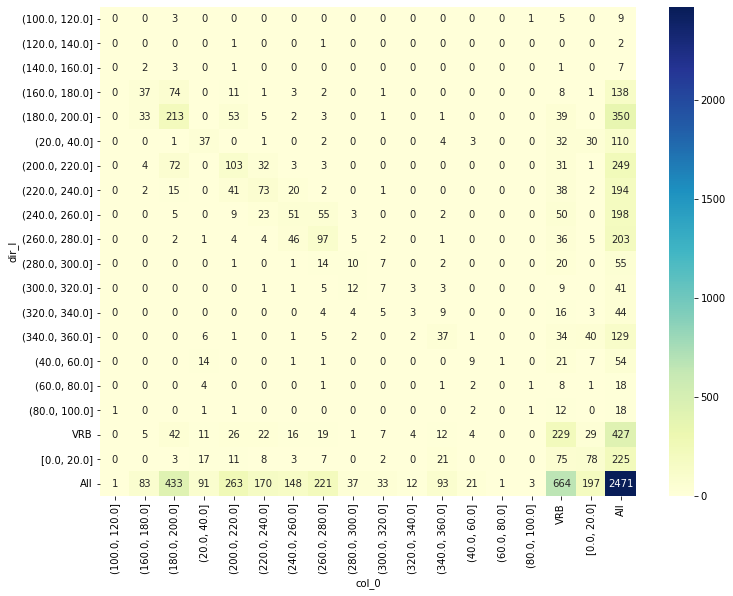

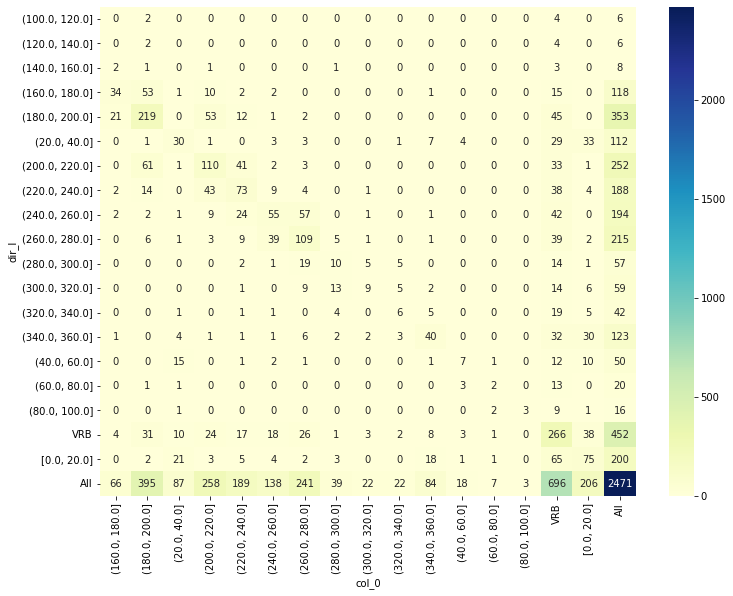

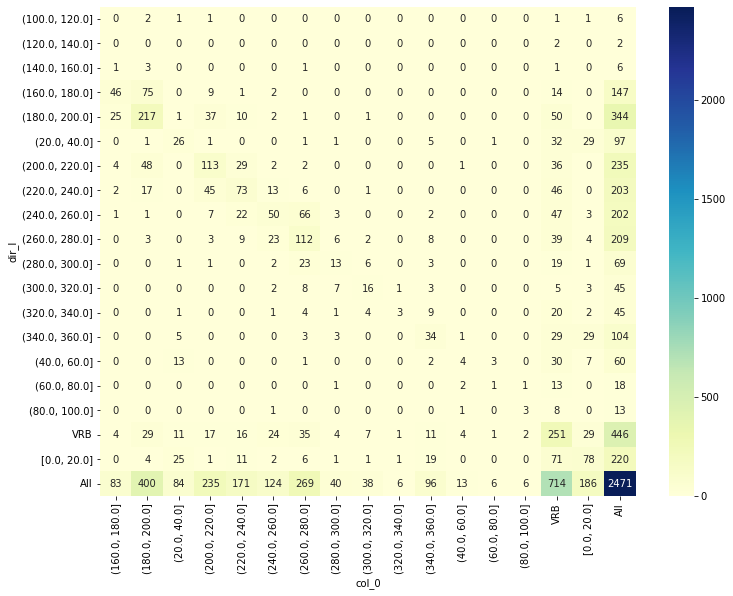

In [32]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = model1k.drop(columns=["Unnamed: 0","dir0_l","dir1_l"]).columns.to_list()  

# X and Y
Y = df_all1k.dir_l
X = df_all1k[x_var]

# loop ranadom

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  #X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  plt.figure(figsize=(12, 9))
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)



In [29]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("dir_LEVX_1km_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])



Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                precision    recall  f1-score      support
(100.0, 120.0]   0.000000  0.000000  0.000000     3.000000
(120.0, 140.0]   0.000000  0.000000  0.000000     2.000000
(140.0, 160.0]   0.333333  0.090909  0.142857    11.000000
(160.0, 180.0]   0.511905  0.284768  0.365957   151.000000
(180.0, 200.0]   0.479810  0.590643  0.529489   342.000000
(20.0, 40.0]     0.304348  0.198113  0.240000   106.000000
(200.0, 220.0]   0.449580  0.414729  0.431452   258.000000
(220.0, 240.0]   0.483660  0.373737  0.421652   198.000000
(240.0, 260.0]   0.323077  0.248521  0.280936   169.000000
(260.0, 280.0]   0.413793  0.534653  0.466523   202.000000
(280.0, 300.0]   0.282051  0.161765  0.205607    68.000000
(300.0, 320.0]   0.480000  0.196721  0.279070    61.000000
(320.0, 340.0]   0.322581  0.188679  0.238095    53.000000
(340.0, 360.0]   0.415094  0.335878  0.371308   131.000000
(40.0, 60.0]     0.171429  0.133333  0.150000    45.000000
(60.0, 80.0]     0.166667  0.066667  0.095238    15.0000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                precision    recall  f1-score      support
(100.0, 120.0]   0.000000  0.000000  0.000000     6.000000
(120.0, 140.0]   0.000000  0.000000  0.000000     4.000000
(140.0, 160.0]   0.000000  0.000000  0.000000    13.000000
(160.0, 180.0]   0.482353  0.278912  0.353448   147.000000
(180.0, 200.0]   0.504739  0.605114  0.550388   352.000000
(20.0, 40.0]     0.337662  0.230088  0.273684   113.000000
(200.0, 220.0]   0.422594  0.392996  0.407258   257.000000
(220.0, 240.0]   0.429348  0.427027  0.428184   185.000000
(240.0, 260.0]   0.335616  0.262032  0.294294   187.000000
(260.0, 280.0]   0.414449  0.516588  0.459916   211.000000
(280.0, 300.0]   0.342105  0.160494  0.218487    81.000000
(300.0, 320.0]   0.157895  0.157895  0.157895    38.000000
(320.0, 340.0]   0.300000  0.130435  0.181818    46.000000
(340.0, 360.0]   0.410000  0.350427  0.377880   117.000000
(40.0, 60.0]     0.360000  0.163636  0.225000    55.000000
(60.0, 80.0]     0.285714  0.111111  0.160000    18.0000

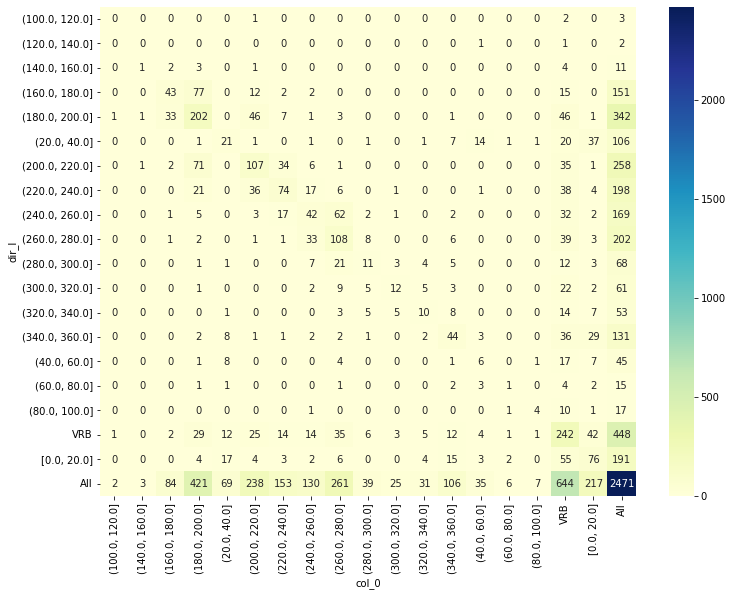

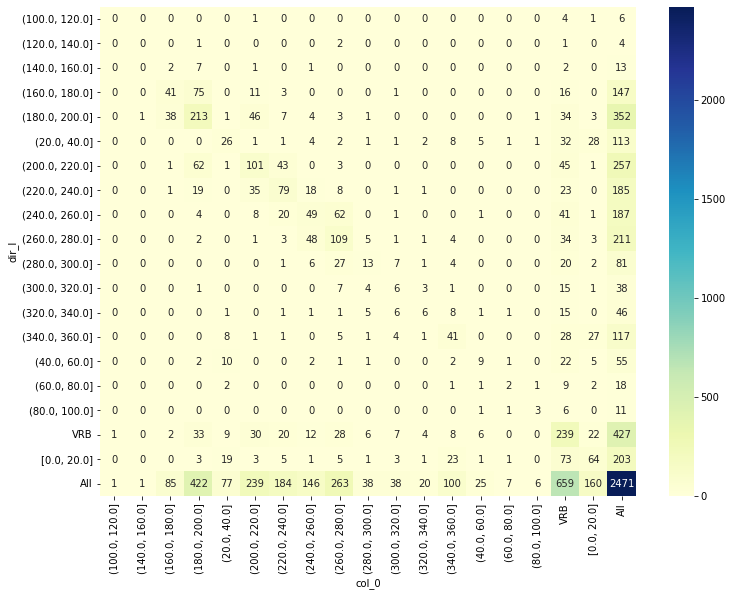

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = model1k.drop(columns=["Unnamed: 0","dir0_l","dir1_l"]).columns.to_list()
# X and Y
Y = df_all1k.dir_l
X = df_all1k[x_var]

# loop ranadom

for t in range (0,2):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  #X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)

  plt.figure(figsize=(12, 9))
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');
  

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

